# COMP60711 - Part 2 Coursework 2

|                           |                                                                                                                                                                               |
|--------------------------:|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|              Course Unit: | COMP60711: Data Engineering                                                                                                                                                   |
| Responsible Staff Member: | Professor John Keane                                                                                                                                                          |
|                    Marks: | This course is worth **25%** of the overall marks for this unit.                                                                                                                |
|              Submissions: | This is the **4th** of **4** assessed submissions.                                                                                                                                    |
|     Method of Submitting: | This notebook, after completion, should be saved as a HTML document and submitted using Blackboard                                                                                      |
|                 Deadline: | Thursday 3rd December 9AM (UK time)                                                                                                                                                                            |
|         Late Submissions: | Extensions will only be granted as a result of formally processed [Mitigating Circumstances](http://documents.manchester.ac.uk/DocuInfo.aspx?DocID=427). Marks for late submissions will be reduced in line with the [University policy](http://documents.manchester.ac.uk/display.aspx?DocID=24561). |

Please complete the questions in the spaces provided (under the "Answer" block for each question), then download the notebook in HTML format and submit to Blackboard.

Please also add your student ID and name below.

| Student ID (7-8 digit number) | Full Name |
|:-------------------------------:|:-----------:|
|      10647902                 |  Yue Zhang         |

# Q1: Pre-processing & Feature Importance (9 marks)

This question will use the `"genes-leukemia.csv"` dataset available on Blackboard. For some background information about this dataset, see https://www.kdnuggets.com/data_mining_course/data/genes-leukemia-description.txt. The sub-questions will involve inspecting and pre-processing the data in order to use a decision tree. We will then look at which features are deemed important for prediction, and how removing important features affects tree structure.

It is expected that you will use `pandas` for this question, though this is not a requirement (but it may be more difficult if you do not).

## Q1.1 (1 mark)

Count the number of records/examples where the "Treatment_Response" feature is non-missing. Describe these examples in terms of the other features (Year from XXXX to YYYY, Gender = X etc.)

**Hint:**
* You need to ensure that you are looking at all of the data. By default, some of the columns may be truncated, in which case you should adjust this (through e.g. `pd.set_option("display.max_columns", 100)`)

## Q1.1 Answer

In [1]:
import pandas as pd

# import data
df = pd.read_csv("genes-leukemia.csv")

df.head()

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,...,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,...,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,...,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,...,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,?,?,?,?,?,0.91,...,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,?,?,?,?,?,0.89,...,94,1011,1871,661,186,364,354,1322,251,626


Since the previous printed dataframe contains '...' I modify the value of display.max_columns in order to show all columns

In [2]:
# show all columns
pd.set_option("display.max_columns", 100)

df.head()

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,?,1996,M,?,?,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,?,?,M,?,?,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,?,?,M,?,?,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,?,?,?,?,?,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,?,?,?,?,?,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626


We can change '?' to nan first, then use function count() to get the count of non-empty values.

In [3]:
import numpy as np

# turn '?' to 'nan'
df = df.replace('?', np.nan)
df.head(100)

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
0,s1,ALL,BM,B-cell,NaN,1996,M,NaN,NaN,1.00,DFCI,75,556,2018,610,193,571,178,654,835,20,767,268,160,3349,408,1124,141,978,393,277,107,178,460,1372,210,1361,298,517,600,994,257,1595,2911,601,358,289,337,1320,397,1582
1,s2,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.41,DFCI,129,476,650,927,31,2893,336,1283,3072,20,814,346,134,1002,633,1062,84,324,118,104,20,183,151,1184,216,237,307,351,337,539,46,822,575,435,82,288,131,898,20,624
2,s3,ALL,BM,T-cell,NaN,NaN,M,NaN,NaN,0.87,DFCI,44,498,573,1697,198,2723,345,1286,609,124,1547,804,167,2089,912,1398,98,855,667,91,20,166,230,2221,250,1240,309,214,574,1441,139,1452,905,547,263,447,529,597,183,753
3,s4,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.91,DFCI,218,1211,2291,425,91,731,374,915,935,167,831,452,104,1625,304,942,20,369,410,403,190,131,314,1051,139,992,693,432,716,680,168,654,2038,472,218,424,422,1644,363,743
4,s5,ALL,BM,B-cell,NaN,NaN,NaN,NaN,NaN,0.89,DFCI,110,820,2796,529,194,649,321,732,1665,114,1423,476,145,3502,398,928,238,653,119,416,361,141,632,1370,270,1233,713,596,524,950,94,1011,1871,661,186,364,354,1322,251,626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,s68,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.80,DFCI,145,734,3090,1226,179,1235,140,859,1618,20,1385,439,216,3869,523,1049,335,1083,386,469,352,107,400,1700,312,1690,1931,517,648,688,202,1131,643,580,255,755,443,3923,67,1088
68,s69,ALL,PB,B-cell,NaN,1998,M,NaN,NaN,0.85,DFCI,84,545,2412,765,91,1284,351,623,1760,182,1012,607,120,1569,146,1496,271,659,349,379,161,152,599,808,457,1211,395,596,391,706,227,1187,2362,573,208,476,258,1794,155,1187
69,s70,ALL,PB,B-cell,NaN,1998,F,NaN,NaN,0.73,DFCI,20,440,1146,344,117,853,30,360,1025,301,334,106,185,1072,252,682,27,85,51,75,86,69,213,490,37,533,43,349,86,519,77,693,1955,348,43,100,89,1277,266,1002
70,s71,ALL,PB,B-cell,NaN,1998,NaN,NaN,NaN,0.30,DFCI,105,113,704,1164,25,1213,263,310,1494,170,146,20,134,227,239,931,78,168,20,75,31,232,232,149,396,471,509,353,396,144,81,1313,1399,218,110,388,81,828,142,1504


In [4]:
# count the number of non-missing records
print(' the "Treatment_Response" feature is non-missing:')
Treatment_Response_non_missing = df['Treatment_Response'].count()
Treatment_Response_non_missing

 the "Treatment_Response" feature is non-missing:


15

Select the records/examples where the "Treatment_Response" feature is non-missing. 

In [5]:
df['Treatment_Response'].value_counts()

Failure    8
Success    7
Name: Treatment_Response, dtype: int64

There are only two results of Treatment_REsponse column, I divided data into two sets.

In [6]:
df_succ = df.loc[df['Treatment_Response'] == 'Success']
df_fail = df.loc[df['Treatment_Response'] == 'Failure']

df_succ

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
33,s34,AML,BM,NaN,M2,NaN,NaN,77,Success,0.64,CALGB,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,AML,BM,NaN,M1,NaN,NaN,67,Success,0.21,CALGB,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,AML,BM,NaN,M5,NaN,NaN,76,Success,0.94,CALGB,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,AML,BM,NaN,M2,NaN,NaN,44,Success,0.95,CALGB,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393
37,s38,AML,BM,NaN,M1,NaN,NaN,80,Success,0.73,CALGB,70,118,355,71,20,201,582,1753,3594,407,111,62,271,230,195,2286,36,20,673,64,20,94,20,51,20,550,1671,199,2538,342,41,721,838,75,33,20,20,275,20,286
51,s52,AML,PB,NaN,M4,NaN,NaN,86,Success,0.61,CALGB,109,131,488,294,20,455,354,801,3266,62,163,20,198,882,70,541,20,222,218,27,20,20,65,401,35,495,2007,109,442,232,36,20,291,248,20,376,25,139,20,250
52,s53,AML,BM,NaN,M2,NaN,NaN,76,Success,0.89,CALGB,106,94,449,109,20,118,308,1534,3457,206,135,45,334,177,76,3568,79,439,300,20,20,161,112,162,125,108,3870,284,4460,288,31,1024,530,158,20,119,39,388,20,367


In [7]:
df_fail

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,AML,BM,NaN,M2,NaN,NaN,79,Failure,0.44,CALGB,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,AML,BM,NaN,M2,NaN,NaN,34,Failure,0.74,CALGB,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,AML,BM,NaN,M5,NaN,NaN,93,Failure,0.80,CALGB,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,AML,BM,NaN,M4,NaN,NaN,77,Failure,0.61,CALGB,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,AML,BM,NaN,M1,NaN,NaN,86,Failure,0.47,CALGB,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,AML,BM,NaN,M2,NaN,NaN,70,Failure,0.89,CALGB,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
49,s50,AML,BM,NaN,M4,NaN,NaN,93,Failure,0.97,CALGB,346,164,675,135,38,578,342,1895,3427,274,225,48,175,185,82,2442,20,20,1375,202,41,20,20,148,20,176,5814,166,729,212,20,802,676,70,45,20,48,197,110,190
50,s51,AML,BM,NaN,M2,NaN,NaN,57,Failure,1.00,CALGB,211,209,506,48,20,446,339,1339,2120,20,126,20,434,249,160,2335,20,34,677,20,201,30,20,148,30,168,2335,112,683,108,90,667,502,64,50,20,52,110,44,382


First, look at the results roughly. From the above two running results, no matter the treatment is successful or unsuccessful, as long as there is an outcome, it is a patient with AML disease, and they are all released by the same hospital, called 'CALGB.' Hiding the year and gender may be for the protection of patients and prevent data leakage. Also, you can see that their year sample is taken and gender is missing. Except for one patient numbered s52, his subtype of leukemia was PB, and he was successfully cured. All other patients with the outcome are of BM type. The subtypes of AML in these patients are M1, M2, M4 and M5.

In [8]:
df_succ.describe()

,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.710000,218.428571,169.142857,504.571429,115.285714,20.285714,150.285714,410.857143,1583.428571,3304.714286,225.285714,166.857143,55.857143,310.285714,360.428571,138.428571,2491.142857,30.714286,156.714286,504.000000,45.142857,20.0,75.714286,96.285714,221.857143,47.428571,297.714286,2717.142857,191.428571,1771.428571,284.857143,44.714286,518.857143,557.857143,125.857143,40.142857,132.000000,36.428571,258.000000,26.714286,364.714286
std,0.260832,118.250944,124.804418,152.838539,100.935151,0.755929,159.150573,96.335228,404.275837,1073.877664,112.124506,62.621691,52.581456,67.393655,243.333007,69.610481,1103.983005,22.111191,159.195597,236.656573,25.386536,0.0,54.343703,72.701936,122.729280,36.568917,176.641553,1315.025656,71.542195,1362.722992,57.167673,24.736709,352.758382,186.629248,73.128719,19.359998,141.325865,26.298651,109.726934,17.764330,71.948394
min,0.210000,70.000000,20.000000,355.000000,20.000000,20.000000,20.000000,308.000000,801.000000,1125.000000,62.000000,87.000000,20.000000,198.000000,177.000000,57.000000,541.000000,20.000000,20.000000,218.000000,20.000000,20.0,20.000000,20.000000,51.000000,20.000000,108.000000,1050.000000,86.000000,442.000000,232.000000,28.000000,20.000000,291.000000,20.000000,20.000000,20.000000,20.000000,126.000000,20.000000,250.000000
25%,0.625000,107.500000,106.000000,417.000000,45.500000,20.000000,20.000000,340.500000,1470.000000,3251.000000,179.000000,123.000000,20.000000,282.000000,227.000000,73.000000,2211.500000,20.000000,20.000000,281.000000,23.500000,20.0,26.500000,42.500000,146.000000,27.000000,159.500000,1839.000000,154.000000,1044.500000,241.500000,30.000000,251.500000,467.500000,81.500000,26.500000,31.500000,20.000000,164.500000,20.000000,326.500000
50%,0.730000,283.000000,131.000000,449.000000,87.000000,20.000000,118.000000,405.000000,1707.000000,3457.000000,206.000000,163.000000,45.000000,322.000000,288.000000,149.000000,2402.000000,20.000000,117.000000,618.000000,35.000000,20.0,81.000000,74.000000,194.000000,35.000000,254.000000,2612.000000,200.000000,1064.000000,267.000000,36.000000,667.000000,530.000000,139.000000,34.000000,64.000000,25.000000,275.000000,20.000000,391.000000
75%,0.915000,303.000000,205.500000,545.500000,157.500000,20.000000,209.500000,450.000000,1782.000000,3701.000000,272.000000,204.500000,59.000000,335.500000,361.000000,201.500000,3053.500000,28.000000,240.500000,662.500000,67.500000,20.0,107.500000,146.500000,307.500000,49.000000,426.500000,3408.500000,231.000000,2172.500000,315.000000,45.500000,709.000000,655.500000,155.500000,50.000000,200.500000,38.500000,343.500000,20.000000,402.500000
max,0.950000,355.000000,410.000000,803.000000,294.000000,22.000000,455.000000,582.000000,2072.000000,4647.000000,407.000000,263.000000,168.000000,417.000000,882.000000,214.000000,3965.000000,79.000000,439.000000,805.000000,79.000000,20.0,161.000000,202.000000,401.000000,125.000000,550.000000,4863.000000,284.000000,4460.000000,382.000000,98.000000,1024.000000,838.000000,248.000000,74.000000,376.000000,93.000000,389.000000,67.000000,454.000000


In [9]:
df_fail.describe()

,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,0.740000,240.750000,227.500000,574.875000,183.125000,29.000000,348.125000,446.375000,1835.500000,2864.125000,215.375000,216.250000,75.750000,266.000000,322.25000,153.625000,2454.000000,27.125000,128.250000,1050.000000,57.000000,45.250000,46.000000,72.500000,265.000000,47.375000,231.250000,3533.250000,171.250000,1019.125000,302.250000,44.500000,656.000000,529.125000,170.125000,49.37500,63.625000,45.50000,305.125000,36.125000,355.500000
std,0.215936,81.964714,71.238032,247.077453,197.665256,14.501231,222.293524,132.022658,428.973526,902.457666,95.387836,101.316689,72.318245,79.494834,174.84585,88.275441,751.977773,10.934056,131.827539,213.556951,60.982433,63.360082,39.579937,62.459129,170.469939,51.040425,125.210394,1673.047583,55.357926,367.034618,225.017301,25.230367,173.011147,219.592764,112.688493,22.95298,69.319009,24.27815,171.735209,31.215552,160.337145
min,0.440000,100.000000,136.000000,109.000000,20.000000,20.000000,65.000000,259.000000,1339.000000,1736.000000,20.000000,110.000000,20.000000,175.000000,133.00000,29.000000,1373.000000,20.000000,20.000000,677.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,147.000000,1548.000000,112.000000,647.000000,108.000000,20.000000,388.000000,225.000000,59.000000,20.00000,20.000000,20.00000,110.000000,20.000000,190.000000
25%,0.575000,195.250000,160.750000,481.500000,54.750000,20.000000,167.250000,341.250000,1544.750000,2057.750000,204.750000,125.750000,20.000000,216.000000,183.50000,79.750000,2161.500000,20.000000,29.000000,993.000000,22.250000,20.000000,20.000000,20.000000,148.000000,20.000000,163.500000,2307.250000,143.000000,717.500000,196.000000,20.000000,576.000000,395.000000,68.500000,38.75000,20.000000,20.00000,199.250000,20.000000,238.000000
50%,0.770000,235.000000,243.000000,588.500000,118.500000,20.000000,342.500000,459.000000,1771.000000,2978.500000,236.500000,191.500000,39.500000,251.000000,288.50000,160.000000,2488.500000,22.500000,76.000000,1091.000000,34.000000,20.000000,25.000000,45.500000,292.000000,24.500000,172.000000,3322.500000,169.000000,909.000000,257.500000,44.000000,686.500000,548.500000,146.000000,50.00000,20.000000,50.00000,264.500000,20.000000,348.000000
75%,0.910000,304.250000,280.000000,716.500000,237.250000,35.000000,481.250000,503.750000,1974.750000,3458.500000,276.000000,302.000000,117.750000,288.250000,405.25000,212.500000,2644.500000,29.500000,192.000000,1142.000000,60.250000,25.250000,56.250000,120.250000,311.500000,41.250000,237.250000,4065.000000,176.000000,1338.750000,297.750000,54.500000,752.500000,676.500000,252.750000,58.75000,87.250000,57.00000,360.000000,37.250000,396.000000
max,1.000000,346.000000,321.000000,871.000000,628.000000,60.000000,683.000000,672.000000,2693.000000,4249.000000,313.000000,368.000000,210.000000,434.000000,651.00000,293.000000,3818.000000,52.000000,380.000000,1375.000000,202.000000,201.000000,127.000000,178.000000,596.000000,165.000000,514.000000,6218.000000,292.000000,1513.000000,832.000000,90.000000,893.000000,863.000000,339.000000,91.00000,192.000000,88.00000,671.000000,110.000000,688.000000


Through the above two results, we can see that it is difficult for us to intuitively judge the relationship between the success of the treatment and other features(gene fragment).

In conclusion, we can describe these example with `CLASS = AML` and `Source = CALGB`. Besides, the "Treatment_Response" feature is non-missing is 15.

## Q1.2 (1 mark)

Explain why it is not correct to build predictive models for "Treatment_Response" using records where it is missing?

## Q1.2 Answer

Because the amount of missing data in Treatment_Response is too large, according to Q1.1, only 15 Treatment_Response of 72 data are non-empty. If the missing values are not dealt with, a large number of predicted results are likely missing (In this case, it is'?'.)

### From Q1.3-Q1.6 (inclusive), use only the subset of data where "Treatment_Response" is non-missing.

## Q1.3 (1 mark)

Remove the features that are either all the same or have all missing values. Which sample fields should you keep?

**Hints:**
* For simplicity in the following questions, also remove "FAB_if_AML".
* "SNUM" should be the index.

## Q1.3 Answer

frist, get the data that 'Treatment_Response' are not empty.

In [10]:
# get the data that 'Treatment_Response' are not empty
df = df.loc[df['Treatment_Response'].isnull() == False]
df

,SNUM,CLASS,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,Source,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,AML,BM,NaN,M2,NaN,NaN,79,Failure,0.44,CALGB,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,AML,BM,NaN,M2,NaN,NaN,34,Failure,0.74,CALGB,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,AML,BM,NaN,M5,NaN,NaN,93,Failure,0.80,CALGB,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,AML,BM,NaN,M4,NaN,NaN,77,Failure,0.61,CALGB,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,AML,BM,NaN,M1,NaN,NaN,86,Failure,0.47,CALGB,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,AML,BM,NaN,M2,NaN,NaN,70,Failure,0.89,CALGB,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,AML,BM,NaN,M2,NaN,NaN,77,Success,0.64,CALGB,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,AML,BM,NaN,M1,NaN,NaN,67,Success,0.21,CALGB,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,AML,BM,NaN,M5,NaN,NaN,76,Success,0.94,CALGB,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,AML,BM,NaN,M2,NaN,NaN,44,Success,0.95,CALGB,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393


Filter out features that all values are the same.

In [11]:
cols = df.columns[df.nunique() == 1]
print(cols)

Index(['CLASS', 'Source'], dtype='object')


Remove the features that are all the same.

In [12]:
# remove the features that are all the same 
df.drop(cols, axis=1, inplace=True)
df

,SNUM,BM_PB,TB_if_ALL,FAB_if_AML,Year,Gender,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,BM,NaN,M2,NaN,NaN,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,BM,NaN,M2,NaN,NaN,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,BM,NaN,M5,NaN,NaN,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,BM,NaN,M4,NaN,NaN,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,BM,NaN,M1,NaN,NaN,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,BM,NaN,M2,NaN,NaN,70,Failure,0.89,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,BM,NaN,M2,NaN,NaN,77,Success,0.64,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,BM,NaN,M1,NaN,NaN,67,Success,0.21,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,BM,NaN,M5,NaN,NaN,76,Success,0.94,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,BM,NaN,M2,NaN,NaN,44,Success,0.95,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393


Filter out all empty columns

In [13]:
cols = df.columns[df.isna().all()]
cols

Index(['TB_if_ALL', 'Year', 'Gender'], dtype='object')

In [14]:
df.drop(cols, axis=1, inplace=True)
df

,SNUM,BM_PB,FAB_if_AML,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,BM,M2,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,BM,M2,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,BM,M5,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,BM,M4,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,BM,M1,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,BM,M2,70,Failure,0.89,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,BM,M2,77,Success,0.64,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,BM,M1,67,Success,0.21,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,BM,M5,76,Success,0.94,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,BM,M2,44,Success,0.95,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393


Remove "FAB_if_AML."

In [15]:
# remove "FAB_if_AML".
df.drop(['FAB_if_AML'], axis=1, inplace=True)
df

,SNUM,BM_PB,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
27,s28,BM,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
28,s29,BM,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
29,s30,BM,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
30,s31,BM,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
31,s32,BM,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
32,s33,BM,70,Failure,0.89,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
33,s34,BM,77,Success,0.64,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
34,s35,BM,67,Success,0.21,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
35,s36,BM,76,Success,0.94,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412
36,s37,BM,44,Success,0.95,311,185,404,87,20,20,415,2072,3808,330,183,20,417,224,149,2539,20,20,805,20,20,81,20,130,20,254,2612,253,1064,267,98,697,466,139,52,20,93,190,20,393


In [16]:
# change index
df.set_index(['SNUM'], inplace=True)
df


,BM_PB,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
s31,BM,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
s32,BM,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688
s33,BM,70,Failure,0.89,100,151,109,20,20,153,672,2693,1871,282,110,20,304,133,73,1373,29,380,1099,33,20,47,63,20,20,307,3482,172,1513,256,20,736,678,59,20,20,20,200,20,248
s34,BM,77,Success,0.64,355,226,803,206,20,20,405,1811,3236,179,263,56,293,427,208,2402,20,20,652,35,20,121,181,279,34,110,2947,200,1807,238,28,302,469,153,34,282,20,299,20,454
s35,BM,67,Success,0.21,295,20,430,20,20,218,327,1406,1125,214,226,168,322,288,57,2137,20,117,262,79,20,33,74,336,40,209,1050,86,1038,382,50,201,548,20,48,43,38,389,67,391
s36,BM,76,Success,0.94,283,410,603,20,22,20,485,1707,4647,179,87,20,337,295,214,3965,20,259,618,71,20,20,202,194,58,358,4863,209,1051,245,29,667,763,88,74,64,20,126,20,412


Therefore, we should keep the features 'BM_PB,' 'pct_Blasts,' 'Treatment_Response,' 'PS,' 'D49950,'	'D63880,' 'J03473,'	'J05243,' 'L13278,'	'L47738,' 'M21551_rna1,' 'M55150,' 'M62762,' 'M81933,' 'M91432,' 'S50223,' 'U12471_cds1,' 'U32944,' 'U35451,' 'U50136_rna1,' 'U53468,' 'U72342,' 'U82759,' 'X15949,' 'X52142,'	'X56411_rna1,' 'X63469,' 'X74262,'	'X76061,' 'X76648,'	'X95735,' 'Y08612,'	'Y12670,' 'D38073,'	'AF012024_s,' 'D26156_s,' 'M84371_rna1_s,' 'M31211_s,' 'U09087_s,' 'U26266_s,' 'L49229_f,' 'M31523,' 'M28170' and 'U29175.'

## Q1.4 (1 mark)

Fit a decision tree (`DecisionTreeClassifier`) using default settings to the data, now that it has been pre-processed.

As we have a small amount of data, if we want to more meaningfully assess the performance, we should use leave-one-out cross-validation. Report the accuracy across each fold, and the overall mean accuracy obtained.

Important: Please use `random_state=42` where necessary to ensure reproducible results.

## Q1.4 Answer

In [17]:
from sklearn.tree import DecisionTreeClassifier

# Divide data and label
df_labels = df['Treatment_Response'].values
df_data = df.drop('Treatment_Response', axis=1)
print(df_labels)

['Failure' 'Failure' 'Failure' 'Failure' 'Failure' 'Failure' 'Success'
 'Success' 'Success' 'Success' 'Success' 'Failure' 'Failure' 'Success'
 'Success']


In [18]:
df_data.head()

,BM_PB,pct_Blasts,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
s31,BM,77,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
s32,BM,86,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688


In [19]:
# Make sure df has not been changed
df.head()

,BM_PB,pct_Blasts,Treatment_Response,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,BM,79,Failure,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,BM,34,Failure,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,BM,93,Failure,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
s31,BM,77,Failure,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
s32,BM,86,Failure,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688


The feature 'BM_PB' is not numeric, and sklearn's decision tree can only handle numeric data, so it should be converted to numeric.

In [20]:
# the function that converte BM_PB to numeric
def change(x): 
    if x['BM_PB'] == 'BM': 
        return 0
    else:
        return 1 

df_data['BM_PB'] = df_data.apply(change, axis = 1)
 
df_data.head()

,BM_PB,pct_Blasts,PS,D49950,D63880,J03473,J05243,L13278,L47738,M21551_rna1,M55150,M62762,M81933,M91432,S50223,U12471_cds1,U32944,U35451,U50136_rna1,U53468,U72342,U82759,X15949,X52142,X56411_rna1,X63469,X74262,X76061,X76648,X95735,Y08612,Y12670,D38073,AF012024_s,D26156_s,M84371_rna1_s,M31211_s,U09087_s,U26266_s,L49229_f,M31523,M28170,U29175
SNUM,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
s28,0,79,0.44,297,279,841,102,20,449,456,1929,2702,313,323,107,238,384,209,1641,20,32,822,64,20,20,28,596,75,214,2224,292,733,832,43,893,443,300,91,151,20,353,20,429
s29,0,34,0.74,190,277,500,237,20,65,259,1647,1736,243,125,150,217,179,29,2545,31,173,1137,35,20,20,178,309,20,514,3348,151,1296,294,50,624,225,237,58,66,20,279,35,314
s30,0,93,0.80,326,136,426,238,20,172,487,2112,3553,229,158,20,213,651,160,3818,21,118,1050,20,20,84,20,313,29,147,6218,173,647,148,20,388,251,100,20,20,60,250,20,208
s31,0,77,0.61,197,321,871,57,60,239,554,1555,3255,132,295,31,283,469,223,2943,52,20,1157,23,20,20,115,275,20,159,1548,119,1085,309,45,432,595,192,61,20,56,381,20,385
s32,0,86,0.47,259,283,671,628,34,683,462,1514,4249,230,368,210,264,328,293,2535,24,249,1083,59,20,127,136,311,165,165,3297,185,1467,259,68,706,863,339,50,192,88,671,20,688


Because we have only one sample as test set, the accruracy on each fold will be one or zero (correct / 1).

In [21]:
# training
clf = DecisionTreeClassifier(random_state=42)

# apply LOO cross validation
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
# print(loo.get_n_splits(df_data))
accs = []

for train_idx, test_idx in loo.split(df_data):
    clf.fit(df_data.iloc[train_idx], df_labels[train_idx])
    
    # print(clf.predict(df_data.iloc[test_idx]))
   
    # Judge whether it is correct
    if clf.predict(df_data.iloc[test_idx]) == (df_labels[test_idx]):
        accs.append(1)
    else:
        accs.append(0)

print('accuracy across each fold:')       
print(accs)

acc = sum(accs) / len(df_data)

print(acc)

accuracy across each fold:
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1]
0.7333333333333333


It can be seen that accuracy across each fold is [1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1], and the average accuracy is 0.733.

## Q1.5 (3 marks)

Split the data into a training and test set (using a 75:25 ratio). Once again, fit a decision tree to this data, and report the accuracy. Visualize the tree (using `tree.plot_tree`), and state which feature/predictor is the most important. Then, removing this top predictor, fit the tree again with this feature removed. Again, report the accuracy and visualize the tree.

Compare the accuracy between the two trees. Explain why the tree is different with this feature removed.

Important: Please use `random_state=3` where necessary to ensure reproducible results.

**Hint:**
* You need to ensure that the _original_ feature names are visible in the tree.

## Q1.5 Answer

y_test is:
['Failure' 'Failure' 'Failure' 'Success']
y_pred is:
['Success' 'Failure' 'Failure' 'Success']
0.75


[Text(167.4, 163.07999999999998, 'U82759 <= 813.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Success'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = Success'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Failture')]

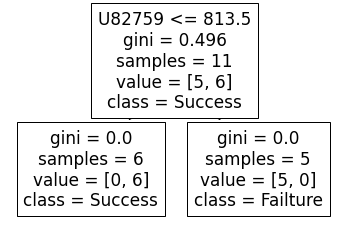

In [22]:
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# split training set ansd test set.
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.25, random_state=3)

clf = DecisionTreeClassifier(random_state=3).fit(X_train, y_train)

# get the pred
y_pred = clf.predict(X_test)
print('y_test is:')
print(y_test)
print('y_pred is:')
print(y_pred)

# get the accuracy before removing the top predictor
acc_before = accuracy_score(y_test, y_pred)
print(acc_before)
plot_tree(clf, feature_names=X_train.columns, class_names=['Failture', 'Success'])

It can be seen that the most important is the feature 'U82759.' Also, the Gini here is 0.496.

We can also know that when feature 'U82759' <= 813.5, the sample will be divided to the left(6 samples), when > 813.5, it will be divided to the right(5 samples). The left represents success, the right represents failure.

Then, we delete the most important feature and do it again.


['Failure' 'Failure' 'Failure' 'Success']
['Success' 'Failure' 'Failure' 'Failure']
0.5


[Text(133.92000000000002, 181.2, 'D63880 <= 133.5\ngini = 0.496\nsamples = 11\nvalue = [5, 6]\nclass = Success'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Success'),
 Text(200.88000000000002, 108.72, 'M31523 <= 193.5\ngini = 0.408\nsamples = 7\nvalue = [5, 2]\nclass = Failture'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Success'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Failture')]

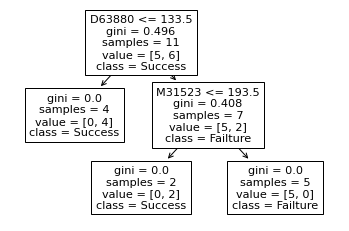

In [24]:
# split training set ansd test set.
df_drop = df_data.drop(['U82759'], axis=1)
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(df_drop, df_labels, test_size=0.25, random_state=3)

clf_drop = DecisionTreeClassifier(random_state=3).fit(X_train_drop, y_train_drop)

# get the pred
y_drop_pred = clf_drop.predict(X_test_drop)
print(y_test_drop)
print(y_drop_pred)

# get the accuracy before removing the top predictor
acc_after = accuracy_score(y_test_drop, y_drop_pred)
print(acc_after)
plot_tree(clf_drop, feature_names=X_train_drop.columns, class_names=['Failture', 'Success'])

The accuracy before deleting the most important feature is 0.75, while the accuracy after deleting the most important feature is 0.5.
The decision tree here uses default values, so the Gini coefficient is used as the standard. The feature with a small Gini coefficient is selected as the classification standard. 
$$ G=1-\sum_{i=1}^kP_i^2$$
The larger the G, the higher the uncertainty of the data;<br />
The smaller the G, the lower the uncertainty of the data;<br />
G = 0, all samples in the dataset are of the same category;

We dropped the most important feature here, is 'U82759.' Before we delete 'U82759', the tree is completely divided according to this feature. After the deletion, the division of the tree has changed. 'D63880' and 'M31523' have become the division standard. When feature 'D63880' <= 133.5, it will be divided to the left, which means the result is a success. When feature 'D63880' > 133.5 and 'M31523' <= 193.5, it is the left subtree of the tree on the right, which means the result is a success. When feature 'D63880' > 133.5 and 'M31523' > 193.5, it is the right subtree of the tree on the right, which means the result is Failure. The Gini coefficient is relatively small, so the result of the entire tree is different.

## Q1.6 (2 marks)

Which tree do you think is more generalizable? You may want to more thoroughly compare the trees (readability, sensitivity/specificity, structure simplicity, etc.).

## Q1.6 Answer

We have got the accuracy rate before, now we start to find 'Sensitivity,' 'Specificity,' 'Precision' and 'F1 score.'

In [25]:
# use recall_score to get sensitivity
# Sensitivity before deleting the most important feature
from sklearn.metrics import recall_score
sens = recall_score(y_test, y_pred, pos_label='Success')
print('Sensitivity before deleting the most important feature:')
print(sens)

# Precision before deleting the most important feature
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred, pos_label='Success')
print('Precision before deleting the most important feature:')
print(prec)

# Specificity before deleting the most important feature
from sklearn.metrics import recall_score
spec = recall_score(y_test, y_pred, pos_label='Failure')
print('Specificity before deleting the most important feature:')
print(spec)

# F1_score before deleting the most important feature
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, pos_label='Success')
print('F1 score before deleting the most important feature:')
print(f1)

Sensitivity before deleting the most important feature:
1.0
Precision before deleting the most important feature:
0.5
Specificity before deleting the most important feature:
0.6666666666666666
F1 score before deleting the most important feature:
0.6666666666666666


In [26]:
# Sensitivity after deleting the most important feature
sens_after = recall_score(y_test_drop, y_drop_pred, pos_label='Success')
print('Sensitivity after deleting the most important feature:')
print(sens_after)

# Precision after deleting the most important feature
prec_after = precision_score(y_test_drop, y_drop_pred, pos_label='Success')
print('Precision after deleting the most important feature')
print(prec_after)

# Specificity before deleting the most important feature
spec_after = recall_score(y_test_drop, y_drop_pred, pos_label='Failure')
print('Specificity after deleting the most important feature:')
print(spec_after)

# F1_score after deleting the most important feature
f1_after = f1_score(y_test_drop, y_drop_pred, pos_label='Success')
print('F1 score after deleting the most important feature:')
print(f1_after)

Sensitivity after deleting the most important feature:
0.0
Precision after deleting the most important feature
0.0
Specificity after deleting the most important feature:
0.6666666666666666
F1 score after deleting the most important feature:
0.0


* Accuracy: The accuracy of the overall model judgment. 
$$ Accuracy = \frac{TP+TN}{TP+TN+FP+FN} $$
The accuracy of the first tree is 0.75, while the second tree is 0.5. The first tree has higher accuracy.
* Readability: Two trees have the same readability.
* Sensitivity: The proportion of positives that are correctly identified.
$$ Sensitivity = \frac{TP}{TP+FN} $$
The sensitivity of the first tree is 1.0, while the second tree is 0.0. The first tree has a higher sensitivity.
* Specificity: The proportion of negatives that are correctly identified.
$$ Specificity = \frac{TN}{TN+FP} $$
The sensitivity of the first tree is 0.67, while the second tree is 0.67. Two trees have the same specificity.
* Precision: The proportion of positives in the prediction that is true positive.
$$ Precision = \frac{TP}{TP+FP} $$
The precision of the first tree is 0.5, while the second tree is 0.67. The first tree has a higher precision.
* F1 score: harmonic mean of precision and recall
$$ F1 = \frac{2}{Sensitivity^{-1}+Precision^{-1}} $$
The F1 score of the first tree is 0.67, while the second tree is 0. The first tree has a higher F1 score.
* Structure simplicity: The first tree structure is simpler than the second.

In conclusion, we should choose the first tree, because it has a higher Accuracy, Sensitivity, Precision and F1 score. Also, the tree structure is simple, and it is not easy to overfit. Its ability to identify positive examples is powerful, and its ability to identify negative examples is not lost to the second tree.

# Q2: Decision Boundaries (4 marks)

In this question, we will visualize the decision boundaries formed by three simple classifiers on an example dataset.

## Q2.1 (4 marks)

We have provided code below to produce the data and to create the decision boundary. You will need to run this code using the following models:
1. "ZeroR" classifier - `sklearn.dummy.DummyClassifier` using the `"most_frequent"` strategy.
2. KNN classifier - `sklearn.neighbors.KNeighborsClassifier`
3. Decision tree classifier - `sklearn.tree.DecisionTreeClassifier`

You will need to modify the code to output the accuracy for each of the models. Using both this information and the visualized decision boundaries, explain the performance of these algorithms. A brief explanation of the classifiers will be required for this.

**Hints:**
* Although not necessary, the use of further visualizations, performance measures, or even datasets may help to support your discussion
* Use the decision boundaries as a reference point to explain the **differences** between the classifiers.

In [27]:
'''
The code below provides you with the functions to get the data,
and plot the decision boundary.

The resulting graphs have not been properly formatted, however,
so you will need to add that. You will also need to modify the 
code to output the accuracy.
'''

import numpy as np    
from sklearn.datasets import make_classification

def get_data():
    # Create data
    data, labels = make_classification(
        n_features=2, n_redundant=0, n_informative=2,
        random_state=1, n_clusters_per_class=1
    )
    # Set the RNG
    rng = np.random.RandomState(42)
    # Add some noise
    data += 2 * rng.uniform(size=data.shape)
    return data, labels

def plot_boundary(X, ax, clf):
    # Plotting decision regions
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.1),
        np.arange(y_min, y_max, 0.1)
    )
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    return ax
    
def boundary_full(data, labels, model, name, **kwargs):
    # Create estimator/model/classifier
    clf = model(**kwargs)
    # Fit the classifier
    clf.fit(data, labels)
    print("Accuracy:",clf.score(data, labels)) ### ??REMOVE FOR STUDENT VERSION ###
    # Create axis
    fig, ax = plt.subplots()
    # Call the provided function
    ax = plot_boundary(data, ax, clf)
    # Now add the data (using scatter)
    # Ensure to colour the points according to the prediction
    ax.scatter(data[:,0], data[:,1], c=labels, s=20, edgecolor="k")
    # Format the graph...
    ax.set_title(name) ### ??REMOVE FOR STUDENT VERSION ###

## Q2.1 Answer

Accuracy: 0.5
Accuracy: 0.96
Accuracy: 1.0


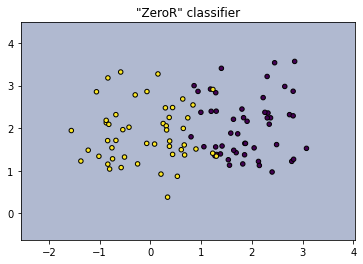

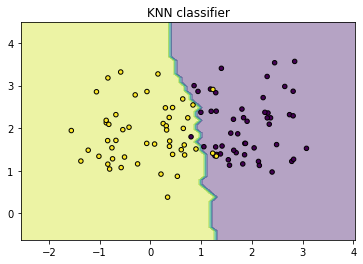

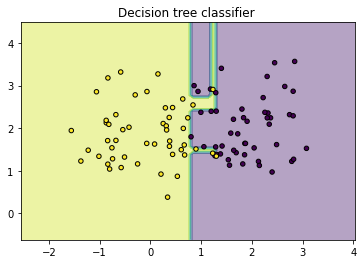

In [28]:
# get data and labels 
data, labels = get_data()

# "ZeroR" classifier - sklearn.dummy.DummyClassifier using the "most_frequent" strategy.
# KNN classifier - sklearn.neighbors.KNeighborsClassifier
# Decision tree classifier - sklearn.tree.DecisionTreeClassifier

# use ZeroR
from sklearn.dummy import DummyClassifier
import sklearn
import matplotlib.pyplot as plt
boundary_full(data, labels, DummyClassifier, '"ZeroR" classifier', strategy='most_frequent')

boundary_full(data, labels, sklearn.neighbors.KNeighborsClassifier, 'KNN classifier')

boundary_full(data, labels, sklearn.tree.DecisionTreeClassifier, 'Decision tree classifier ')

# zeroR = DummyClassifier(strategy='most_frequent', random_state=3).fit(data, labels)

# # visualized decision boundaries
# plot_boundary()

* "ZeroR" classifier: From the figure above, it can be seen that this classifier has no decision boundary because it always predicts the most frequent label in the training set. It can also be seen that its accuracy rate is 0.5, not very high.


* KNN classifier: From the figure above, it can be seen that this classifier has a continuous decision boundary. In kNN classifier, the label of the unknown sample depends on the label of the nearest N samples. We use the default value here, so each sample is of equal weight, and the distance between them is Euclidean (L2) distance. Its accuracy rate is 0.96, this is because kNN here uses Euclidean distance to find the shortest distance, and some samples mixed into another label will be misclassified.


* Decision tree classifier: From the figure above, it can be seen that this classifier has discrete decision boundaries. To put it bluntly, the decision tree means to make 'if-else' judgments to classify continuously. It is a tree structure. When building a decision tree classifier, we mainly care about what features are used to classify and how many branches and leaves are divided. The more important nodes are divided first. We have many ways to find the most important nodes. The classifier here uses the default value, so it is classified by the Gini coefficient. Its accuracy rate is 1, prove that all labels are predicted correctly. Although it works well on the training set, it is easy to overfit.



In summary, the boundaries of these three classifiers are different. 

"ZeroR" has no boundaries, kNN has continuous boundaries, and decision trees have discontinuous boundaries.

The "ZeroR" classifier will not be applied to real-life scenarios, because it only takes a label that appears most often as a result. The effect of kNN and decision trees is better. Decision trees are not sensitive to noise, but they may weaken their generalization ability due to too many features, resulting in overfitting problems. The kNN algorithm involves finding the distance, which has a high computational cost and is very sensitive to noise.

# Question 3: Training Time Comparison (4 marks)

## Q3.1 (2 marks)

Plot the training time for both `DecisionTreeClassifier` and `GaussianNB` against the data size. A function to generate the data is provided to you, which takes the size as its only argument.

Explain what you observe and your understanding in terms of training time and data size (include a graph). Consider algorithm implementation and potential stochasticity in running times.

In [29]:
# Use this function to measure the time
from time import time

# Use this function to generate the data
def create_data(size):
    # Create data
    data, labels = make_classification(
        n_samples=size,
        n_features=2, n_redundant=0, n_informative=2,
        random_state=4, n_clusters_per_class=1
    )
    return data, labels

## Q3.1 Answer

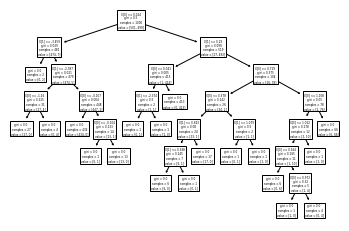

In [30]:
from sklearn.naive_bayes import GaussianNB
tree_time = []
g_time = []
for size in range(1000, 30000, 1000):
    data, labels = create_data(size)
    t0 = time()
    tree = DecisionTreeClassifier().fit(data, labels)
    t1 = time()
    GaussianNB().fit(data, labels)
    t2 = time()
    # convert into ms
    tree_time.append(1000*(t1 - t0))
    g_time.append(1000*(t2 - t1))
    # print(tree_time, g_time)
    
    # When size=1000, draw the tree for comparison
    if size == 1000:
        plot_tree(tree)


In [31]:
# when size=1000, plot tree
# plot_tree(tree)

The result is:
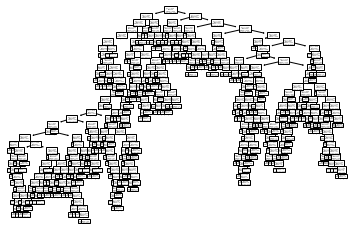

I drew a tree with size = 1000 and a tree with size = 30000 as a comparison. When size = 30000, the tree is too big and there is a lot of text(Hundreds of rows), so I put a screenshot when size=30000.

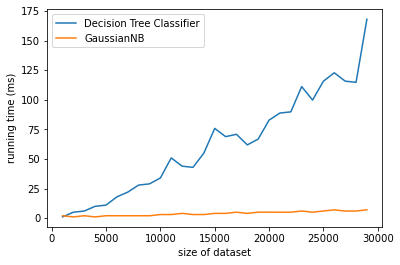

In [32]:
plt.plot(range(1000, 30000, 1000), tree_time, label='Decision Tree Classifier')
plt.plot(range(1000, 30000, 1000), g_time, label='GaussianNB')
plt.xlabel('size of dataset')
plt.ylabel('running time (ms)')
plt.legend()

According to the relationship between the size of the dataset and the time, we can conclude that the running speed of the decision tree algorithm is positively related to the size of the dataset. The running time of the decision tree algorithm becomes longer as the dataset increases. The main reason for the slower running speed is that the depth of the tree has become larger. You can refer to my running result graph. Comparing size=1000 and 30000, you can get a significant increase in the depth of the tree, and the number of splits will increase. The calculation cost increases a lot, because the decision tree usually require all features to be sorted in order to decide where to split the data and each split must calculate the Gini coefficient for the feature.

However, there is no obvious correlation between the running time of the GaussianNB algorithm and the size of the dataset. This is because, for the GaussianNB algorithm, the size of the dataset is only used when calculating the prior probability and conditional probability. The Naive Bayes algorithm uses probability and statistics knowledge (Bayesian formula) for classification. When calculating the probability, GaussianNB assumes that the continuous values associated with each category are distributed according to the Gaussian distribution. 

## Q3.2 (2 marks)
What do you think would happen if we continue increasing the number of instances? Which of the algorithms would be more suitable for a very large number of instances and why? Consider the algorithms’ complexity and how they scale.

## Q3.2 Answer

If we continue increasing the number of instances, the `DecisionTreeClassifier` will become very slowly, while the running speed of GaussianNB will not change much. If we continue to use the default values, GaussianNB will perform better. This is because the deeper the decision tree, the easier the model is to overfit. For GaussianNB, the final result is related to all samples, so the larger the amount of data, the better the model performance.

# Question 4: Memory Usage Comparison (3 marks)

# Q4.1 (3 marks)

Plot the memory usage of the `DecisionTree` model against the data size. Explain the memory usage of the model (including a graph in your answer).

You should use the same `create_data()` function provided for Q3, and ensure that you have downloaded `memory.py` from Blackboard in order to load the `measure_memory()` function.

In [33]:
from memory import measure_memory

## Q4.1 Answer

Text(0, 0.5, 'memory usage')

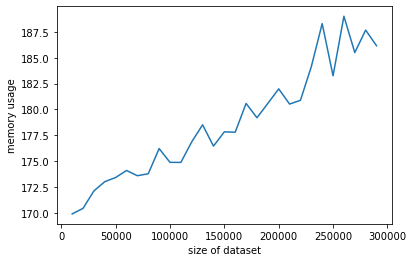

In [35]:
mem = []
for size in range(10000, 300000, 10000):
    data, labels = create_data(size)
    mem.append(measure_memory(data, labels, DecisionTreeClassifier()))

plt.plot(range(10000, 300000, 10000), mem)   
plt.xlabel('size of dataset')
plt.ylabel('memory usage')

It can be seen that the memory usage of the decision tree increases as the size of dataset increases. 

Considering the memory usage is very complicated. This is not only related to the way sklearn implements the decision tree classifier (sometimes the algorithm has internal optimization), but also related to the implementation of garbage collector in python since there are several different implementations and versions of python (which will cause certain fluctuations in the curve.) Here we can only roughly Analyze why this happens.

Both the amount of data and the depth of the tree will take up memory storage.

First, the more data, the greater the memory usage.

Furthermore, our decision tree classifier uses the default value, which means that it will consider all features when building the model, and there will be no restriction on the number of leaf nodes of the spanning tree. The minimum number of samples required to split an internal node is 2 (as long as a node has two samples, it can continue to be divided), and the minimum number of samples required on a leaf node is 1 (only one sample can be used as a leaf node). There is no limit to the maximum depth. Nodes are expanded until all leaves are pure. All these parameter settings will cause this tree to be very deep (you can also refer to my previous picture). The number of nodes in a binary tree of depth D is $2^D−1$, the space of storage nodes is positively correlated with the number of nodes, so it is also positively correlated with depth. 

Also, we did not consider the memory usage required when calculating the Gini coefficient, because the data is sorted when looking for the most important nodes, and sorting also requires memory usage. The larger the dataset, the more memory is consumed.